In [1]:
# Author : Deepak Khatri
# Date : 26th Feb 2020
from utils import detector_utils as detector_utils
import cv2
import tensorflow as tf
import datetime
import argparse
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
detection_graph, sess = detector_utils.load_inference_graph()

> ====== loading HAND frozen graph into memory
>  ====== Hand Inference graph loaded.


0.9999454


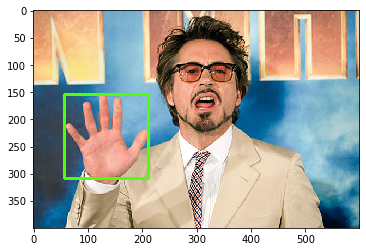

In [3]:
cap = cv2.imread("assets/hai_robert.jpg")
im_height, im_width = cap.shape[:2]
image_np = cv2.cvtColor(cap, cv2.COLOR_BGR2RGB)
cap = image_np.copy()
# cv2.imshow("",cap)
boxes, scores = detector_utils.detect_objects(image_np, detection_graph, sess)
detector_utils.draw_box_on_image(
            1, 0.7, scores, boxes, im_width, im_height, image_np)
plt.imshow(image_np)

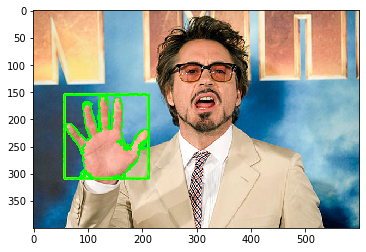

In [4]:
(left, right, top, bottom) = (boxes[0][1] * im_width, boxes[0][3] * im_width,
                                          boxes[0][0] * im_height, boxes[0][2] * im_height)
black = np.zeros((im_height, im_width, 3), np.uint8) 
black1 = cv2.rectangle(black,(int(left),int(top)),(int(right),int(bottom)),(255, 255, 255), -1)
gray = cv2.cvtColor(black,cv2.COLOR_BGR2GRAY) 
ret,b_mask = cv2.threshold(gray,127,255, 0) 
fin = cv2.bitwise_and(black1, cap, mask = b_mask)
output = cv2.Canny(fin, 100, 200)
image, contours, hierarchy = cv2.findContours(output, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
image = cv2.drawContours(image_np, contours, -1, (0, 255, 0), 2)
plt.imshow(image)
